### **CORRELATION BETWEEN BRAZIL'S CPI AND INTEREST RATE**

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ipeadatapy as ipea

#### **1 - BUILDING THE DATAFRAMES**

##### Let's get to know the database and define our dataframes for CPI and Interest Rate.

##### **1.1 - CPI:**

In [2]:
ipea.list_series('IPCA')

,CODE,NAME
4565,BM12_IPCA2012,IPCA - núcleo médias aparadas com suavização -...
4566,BM12_IPCA20N12,IPCA - núcleo médias aparadas sem suavização ...
4567,BM12_IPCACOM12,IPCA - preços livres - comercializáveis - taxa...
4568,BM12_IPCAEXC12,IPCA - núcleo por exclusão - sem monitorados e...
4569,BM12_IPCAEXCEX212,IPCA - núcleo por exclusão - EX1 - taxa de var...
4570,BM12_IPCAEXP1212,Expectativa média de Inflação - IPCA - taxa ac...
4571,BM12_IPCAEXP612,Expectativa média de Inflação - IPCA - taxa an...
4572,BM12_IPCANCOM12,IPCA - preços livres - não comercializáveis - ...
4573,BM12_IPCAPL12,IPCA - preços livres - taxa de variação
4574,BM12_IPCAPLBD12,IPCA - preços livres - bens duráveis - taxa de...


Seems like the data we want to use is PRECOS12_IPCAG12. 

Lets take a deeper look into it:

In [3]:
ipea.describe('PRECOS12_IPCAG12')

,IPCA - geral - taxa de variação
Name,IPCA - geral - taxa de variação
Code,PRECOS12_IPCAG12
Big Theme,Macroeconômico
Theme code,9
Source,Instituto Brasileiro de Geografia e Estatístic...
Source acronym,IBGE/SNIPC
Comment,O Índice Nacional de Preços ao Consumidor Ampl...
Last update,2023-04-11T09:14:00.827-03:00
Frequency,Mensal
Measure,(% a.m.)


Our timeseries should be a 25 year-long sample:

In [4]:
ipea.timeseries('PRECOS12_IPCAG12',yearGreaterThan=1998)

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.m.))
DATE,,,,,,
1999-01-01,PRECOS12_IPCAG12,1999-01-01T00:00:00-02:00,1,1,1999,0.70
1999-02-01,PRECOS12_IPCAG12,1999-02-01T00:00:00-02:00,1,2,1999,1.05
1999-03-01,PRECOS12_IPCAG12,1999-03-01T00:00:00-03:00,1,3,1999,1.10
1999-04-01,PRECOS12_IPCAG12,1999-04-01T00:00:00-03:00,1,4,1999,0.56
1999-05-01,PRECOS12_IPCAG12,1999-05-01T00:00:00-03:00,1,5,1999,0.30
...,...,...,...,...,...,...
2022-11-01,PRECOS12_IPCAG12,2022-11-01T00:00:00-03:00,1,11,2022,0.41
2022-12-01,PRECOS12_IPCAG12,2022-12-01T00:00:00-03:00,1,12,2022,0.62
2023-01-01,PRECOS12_IPCAG12,2023-01-01T00:00:00-03:00,1,1,2023,0.53


Ok! Now lets set our dataframe and drop some unwanted columns:

In [5]:
dfIPCA = ipea.timeseries('PRECOS12_IPCAG12',yearGreaterThan=1998)

In [6]:
dfIPCA.drop(['CODE', 'RAW DATE', 'DAY', 'MONTH', 'YEAR'], axis=1, inplace=True)

In [7]:
dfIPCA.tail()

,VALUE ((% a.m.))
DATE,
2022-11-01,0.41
2022-12-01,0.62
2023-01-01,0.53
2023-02-01,0.84
2023-03-01,0.71


##### **1.2 - Interest Rate:**

In [8]:
ipea.list_series('Selic')

,CODE,NAME
862,BM12_TFPPNCN12,Meio de pagamento ampliado - M4 - títulos fed...
863,BM12_TFPPNCNY12,Meio de pagamento ampliado - M4 - títulos fede...
3005,BM12_TPFOVER12,Títulos - federais - indexados à Over / Selic ...
3006,BM12_TPFOVERMA12,Dívida mobiliária federal - participação index...
7466,PAN_TJOVER,Taxa de juros nominal - Over / Selic
7487,PAN12_TJOVER12,Taxa de juros nominal - Over / Selic
7512,PAN4_TJOVER4,Taxa de juros nominal - Over / Selic
8526,BM12_TJOVER12,Taxa de juros - Over / Selic - acumulada no mês
8531,BM366_TJOVER366,Taxa de juros - Selic - fixada pelo Copom
8545,GM366_TJOVER366,Taxa de juros - Over / Selic


In [9]:
ipea.describe('BM12_TJOVER12')

,Taxa de juros - Over / Selic - acumulada no mês
Name,Taxa de juros - Over / Selic - acumulada no mês
Code,BM12_TJOVER12
Big Theme,Macroeconômico
Theme code,39
Source,"Banco Central do Brasil, Boletim, Seção mercad..."
Source acronym,Bacen/Boletim/M. Finan.
Comment,Receber uma quantia hoje ou no futuro não são ...
Last update,2023-04-29T06:08:00.517-03:00
Frequency,Mensal
Measure,(% a.m.)


In [10]:
dfSELIC = ipea.timeseries('BM12_TJOVER12',yearGreaterThan=1998)

In [11]:
dfSELIC.drop(['CODE', 'RAW DATE', 'DAY', 'MONTH', 'YEAR'], axis=1, inplace=True)

In [12]:
dfSELIC.tail()

,VALUE ((% a.m.))
DATE,
2022-12-01,1.12
2023-01-01,1.12
2023-02-01,0.92
2023-03-01,1.17
2023-04-01,0.92


Now that we have our dataframes defined, lets merge them into a single one that we can work upon:

In [13]:
df = pd.merge(dfSELIC, dfIPCA, on='DATE')

In [14]:
df.columns = ["SELIC", "IPCA"]

In [15]:
df.tail()

,SELIC,IPCA
DATE,,
2022-11-01,1.02,0.41
2022-12-01,1.12,0.62
2023-01-01,1.12,0.53
2023-02-01,0.92,0.84
2023-03-01,1.17,0.71


##### **1.3 - Plotting the merged dataframes:**

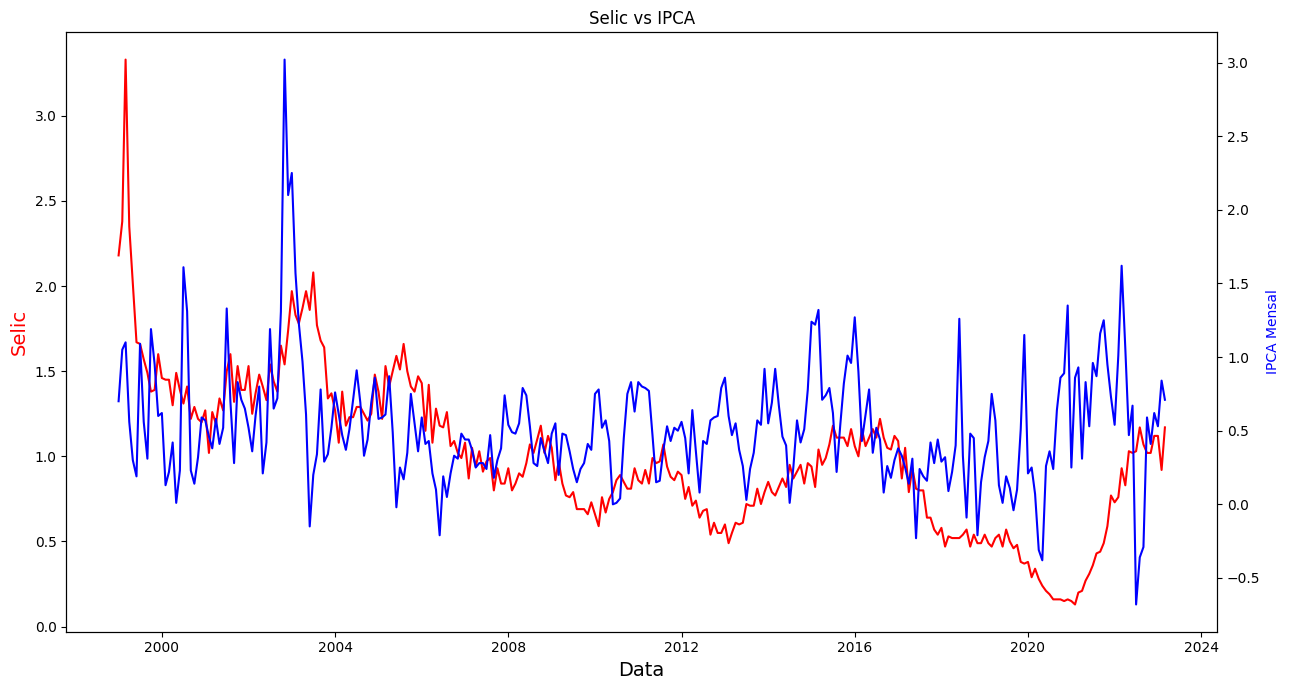

In [16]:
fig,ax = plt.subplots(figsize=(13,7))
ax.plot(df.index, df.SELIC, color="red")
ax.set_xlabel("Data",fontsize=14)
ax.set_ylabel("Selic",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(df.index, df.IPCA, color="blue")
ax2.set_ylabel("IPCA Mensal",color="blue")

plt.title("Selic vs IPCA")
fig.tight_layout()
plt.show()

#### **2 - ANALYSING THE CPI/INTEREST RATE CORRELATION:**

In [17]:
df.corr()

,SELIC,IPCA
SELIC,1.000000,0.201209
IPCA,0.201209,1.000000


<Axes: >

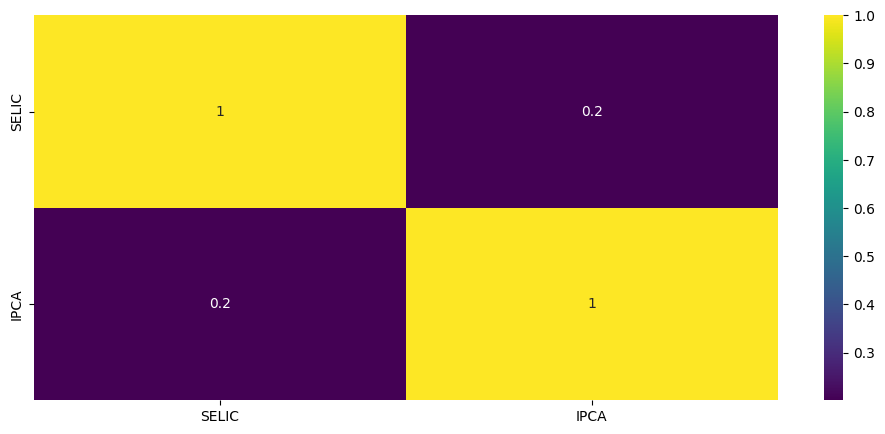

In [18]:
plt.figure(figsize=(12,5))
sns.heatmap(data=df.corr(), cmap='viridis', annot=True)